# *Insurance cost Dataset*

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE


from sklearn.dummy import DummyRegressor

 **Loading the data and making sure it's loaded by printing it**

In [4]:
data = pd.read_csv(r'C:\Users\yasmi\OneDrive\Desktop\insurance.csv', sep =',')

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


 **1. Lets take a look at the data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**2. Lets see if there are any nulls in our Data**

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**3. Next we will have to convert the "sex" collumn into ints so it could be comparable**

In [8]:
data_sex = pd.get_dummies(data['sex'])
data_new = pd.concat([data, data_sex], axis=1)

data_new

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


**4. next we would like to understand our data better therefore we will need to know the folllowings:**


In [9]:
data_new.describe()

,age,bmi,children,charges,female,male
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


In [10]:
mean = data.charges.mean()
mean

13270.422265141257

**5. Who are the people that charge the insurance more than the average amount?**



**Group 1**

In [11]:
data[data['charges']>=mean].describe()

,age,bmi,children,charges
count,420.000000,420.000000,420.000000,420.000000
mean,42.464286,31.039250,1.138095,27751.288177
std,15.244582,5.980884,1.202613,11583.651568
min,18.000000,17.195000,0.000000,13352.099800
25%,29.000000,26.695000,0.000000,17923.109290
50%,43.000000,30.887500,1.000000,24516.677630
75%,57.000000,35.507500,2.000000,37712.051525
max,64.000000,52.580000,5.000000,63770.428010


 **6. Who are the people that charge the insurance less than the average amount?**

**Group 2**

In [12]:
data[data['charges']<mean].describe()

,age,bmi,children,charges
count,918.000000,918.000000,918.000000,918.000000
mean,37.716776,30.491438,1.075163,6645.189495
std,13.211490,6.146670,1.206947,3539.135271
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.125000,0.000000,3485.885525
50%,38.000000,30.127500,1.000000,6397.947400
75%,49.000000,34.298750,2.000000,9633.502750
max,62.000000,53.130000,5.000000,13228.846950


*We can notice that 420 people charge the insurance more than the average ammount, which is 31.4%. 918 people charge less than the average amount. A few things that we can see by looking at the two groups are: The mean age in the first group is smaller by 4.75 years like we predicted would happen. The mean BMI isn't signefically smaller but is smaller in group 2 than group 1. Average childern is higher in group 1 than group 2.*

**7. We would next want to find out whether there is a correlation between any of the variables and the charge, in order to do that we will plot different graphs with different values for axis.**

*We will first want to see how our data is distributed.*

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

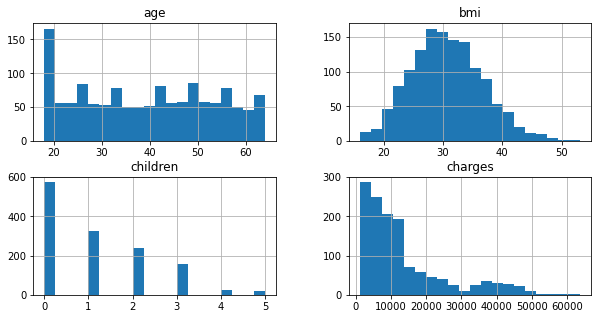

In [13]:
atttibutes_hist = data[["age", "bmi" , "children", "charges"]].hist(bins=20, figsize=(10,5))
atttibutes_hist

<AxesSubplot:xlabel='bmi', ylabel='charges'>

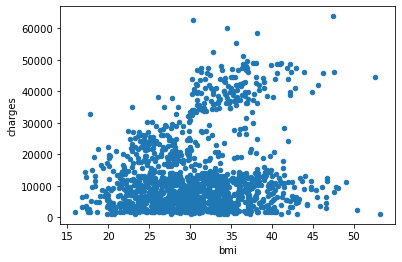

In [14]:
data.plot.scatter(x="bmi", y="charges")

<AxesSubplot:xlabel='age', ylabel='charges'>

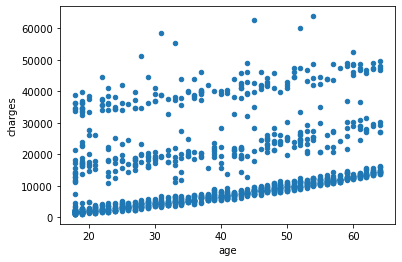

In [15]:
data.plot.scatter(x="age", y="charges")

<AxesSubplot:xlabel='children', ylabel='charges'>

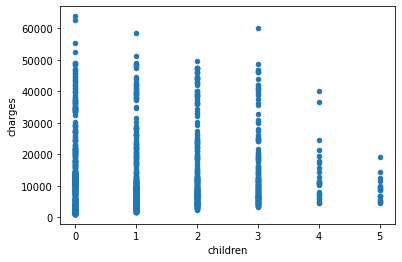

In [16]:
data.plot.scatter(x="children", y="charges")
#we need to normalizie this visulalization

*We notice that there isn't a segnificant correlation between children and charges.*

**8. Next we will try to find out whether smoking affects the charges as well, as smoking isn't a number but a "yes" or "no" answer we will plot it as the following:**

<Figure size 1008x576 with 0 Axes>

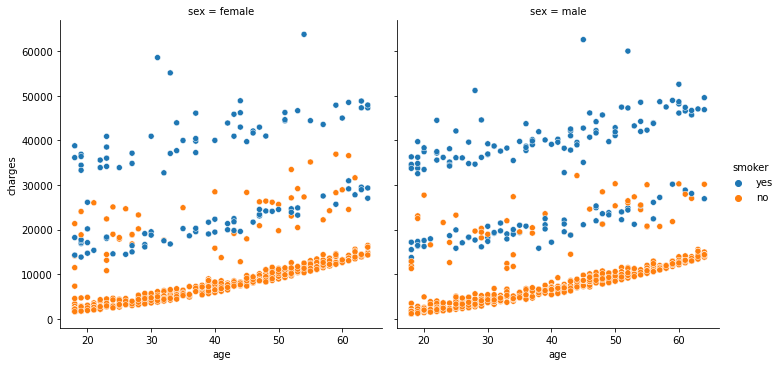

In [17]:
plt.figure(figsize=(14, 8))
sns.relplot(x='age', y='charges', col='sex', hue='smoker', data=data)

*We notice that there is a correlation between smoking and not smoking and the charges, all the smokers are averagly above the none smokers. There are some annomalies, these can be explained by high/ low BMI as we'll see in the next graph, people who may have smoked in the past and decided to quit, or maybe have unrelated diseases or accidents. We see that the smoking part explains a lot of the data and gives us more information than the plots before. Another important thing to notice is that the male and female graphs are very simmilar.*

**9. As the smoking column gave us a much better understanding of the "age" vs "charging" graph we will do the same with "BMI" as we predicted at first that it would also affect the charges:**

<Figure size 1008x504 with 0 Axes>

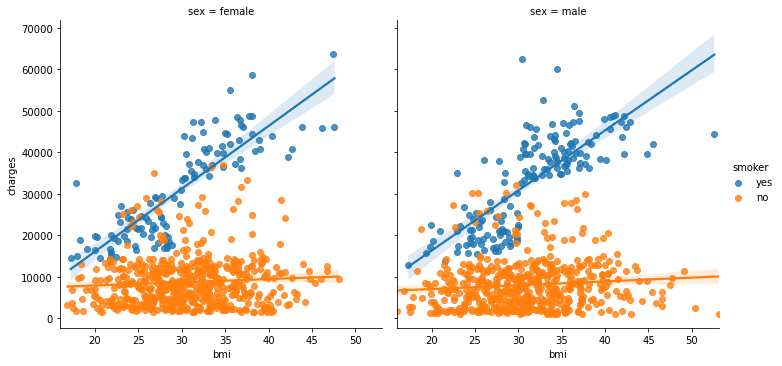

In [18]:
plt.figure(figsize=(14, 7))
sns.lmplot(x="bmi", y="charges",col='sex', hue='smoker', data=data)

*Indeed we see that dividing the data into smokers and non smokers gives us a better understanding of what is happening in our data, we can see that people with BMI of 20-35 are usually charging the insurance less (as long as they don't smoke) with some anomalies that can be explained by a few reasons that may include: People who used to smoke in the past but are no longer smoking. People with background health complications. Age. Again, both male and female graphs are very simillar.*

**10. Next we will do the same with region to find out if it could give us more information about our data**

<Figure size 1008x576 with 0 Axes>

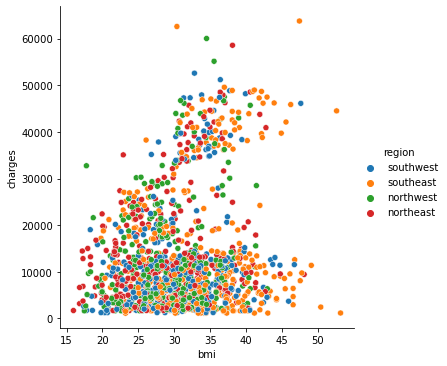

In [19]:
plt.figure(figsize=(14, 8))
sns.relplot(x='bmi', y='charges', hue='region', data=data)

*We notice that there are different coloured dots all over the graph therefore we can assume that the region doesn't have a great effect on the charges.
We saw that there's supposed to be a strong correlation between age, bmi, smoking and charges, in order to find that we will turn smoking from "yes" or "no" to int.*

In [20]:
feature_cols = ['age', 'sex', 'bmi', 'children', 'smoker','region']
X = data[feature_cols]
X = data[['age', 'sex', 'bmi', 'children', 'smoker','region']]

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [21]:
featured_y = ['charges']
y = data[featured_y]
y = data[['charges']]

y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


**10.2.splitting the data into a Training set and a Test set**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1003, 6)
(1003, 1)
(335, 6)
(335, 1)


In [23]:
data_smoke = pd.get_dummies(data['smoker'])
data_ns = pd.concat([data, data_smoke], axis=1)

data_ns

,age,sex,bmi,children,smoker,region,charges,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


**11. After splitting the data into training and testing sets we will convert the catagorial parameters into numericals.
In order to do that we will use the get_dummies function**

In [24]:
data_copy = data.copy()
data_result = pd.get_dummies(data_copy, columns=[ 'sex', 'smoker','region'], prefix=[ 'sex', 'smoker','region'])
data_result.rename(columns={"smoker_0": "no_smoker", "smoker_1": "yes_smoker", "sex_0": "female_sex", "sex_1": "male_sex", "region_0": "southeast_region", "region_1": "southwest_region", "region_2": "northeast_region", "region_3": "northwest_region"}, inplace=True)

data_result

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [25]:
feature_cols = ['age', 'sex_male', 'sex_female', 'bmi', 'children', 'smoker_yes', 'smoker_no','region_southeast', 'region_southwest', 'region_northeast', 'region_northwest']

X = data_result[feature_cols]

X = data_result[['age', 'sex_male', 'sex_female', 'bmi', 'children', 'smoker_yes', 'smoker_no','region_southeast', 'region_southwest', 'region_northeast', 'region_northwest']]

X.head()

,age,sex_male,sex_female,bmi,children,smoker_yes,smoker_no,region_southeast,region_southwest,region_northeast,region_northwest
0,19,0,1,27.900,0,1,0,0,1,0,0
1,18,1,0,33.770,1,0,1,1,0,0,0
2,28,1,0,33.000,3,0,1,1,0,0,0
3,33,1,0,22.705,0,0,1,0,0,0,1
4,32,1,0,28.880,0,0,1,0,0,0,1


In [26]:
y = data_result['charges']

y = data_result.charges

y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1003, 11)
(1003,)
(335, 11)
(335,)


**12. We will next try to fit the model to the training data in order to next check our accuracy against the testing data**

In [28]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [29]:
list(zip(feature_cols, linreg.coef_))

[('age', 251.64371750650835),
 ('sex_male', -134.58711184310678),
 ('sex_female', 134.58711184310164),
 ('bmi', 323.55348379603515),
 ('children', 358.29856178869414),
 ('smoker_yes', 12045.481332829066),
 ('smoker_no', -12045.481332829066),
 ('region_southeast', -422.8072815640233),
 ('region_southwest', -227.11815969070403),
 ('region_northeast', 445.0430738809568),
 ('region_northwest', 204.8823673737675)]

# Dummy model vs Linear regression model

**13. In the next section we will check the dummy model vs the linear regression model, the data will be measured against the MSE and MAE which are both used to check the error of our models.**

In [31]:
dummy_reg= DummyRegressor()

dummy_reg.fit(X_train,y_train)
y_pred = dummy_reg.predict(X_test)
R2 = dummy_reg.score(X_test, y_test)
mae = MAE(y_test, y_pred)
mse= MSE(y_test, y_pred)


print('The R2 score of the dummy model is: ' + str(R2))
print('The MAE score of the dummy model is: ' + str(mae))
print('The MSE score of the dummy model is: ' + str(mse))

The R2 score of the dummy model is: -0.0025118620096058475
The MAE score of the dummy model is: 8599.032593501659
The MSE score of the dummy model is: 134853317.27002954


**14. Moving onto the next model - the linear regression**

In [32]:
linreg = LinearRegression()

r2= np.mean(np.sqrt(cross_val_score(linreg, X_train, y_train, cv=10)))
rmse = np.mean(np.sqrt(-cross_val_score(linreg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)))
mae = np.mean(-cross_val_score(linreg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))


print(str(r2))
print(str(mae))
print(str(rmse*rmse))

0.8640761200092552
4233.743914557359
37420681.46146849


**15. Next we will try and cancel out the region as we saw previously that it doesn't affect the charges as much as the other parameters:**

In [33]:
rmse= np.mean(np.sqrt(-cross_val_score(linreg, X_train[['age', 'children','smoker_yes','smoker_no', 'age', 'bmi']], y_train, scoring='neg_mean_squared_error', cv=10)))
r2= np.mean(np.sqrt(cross_val_score(linreg, X_train[['age','children', 'smoker_yes','smoker_no', 'age', 'bmi']], y_train, cv=10)))
mae = np.mean(-cross_val_score(linreg, X_train[['age', 'children', 'smoker_yes','smoker_no', 'age','bmi']], y_train, scoring='neg_mean_absolute_error', cv=10))


print(str(r2))
print(str(mae))
print(str(rmse*rmse))

0.8646608739011985
4222.817150066107
37256794.0028654


In [34]:
rmse = np.mean(np.sqrt(-cross_val_score(linreg, X_train[['age', 'children','smoker_yes','smoker_no', 'age', 'bmi']], y_train, scoring='neg_mean_squared_error', cv=10)))
r2 = np.mean(np.sqrt(cross_val_score(linreg, X_train[['age','children', 'smoker_yes','smoker_no', 'age', 'bmi']], y_train, cv=10)))
mae = np.mean(-cross_val_score(linreg, X_train[['age','smoker_yes','smoker_no', 'age','bmi']], y_train, scoring='neg_mean_absolute_error', cv=10))


print(str(r2))
print(str(mae))
print(str(rmse*rmse))

0.8646608739011985
4243.069159641227
37256794.0028654


*By removing the region from the data we got better results therefore we'll continue on using our data without the region parameter, however when we tried to remove the children attribute the MAE increase telling us the error increased therefore we chose to leave it.*

**16. Making predictions:**

In [33]:
y_pred = linreg.predict(X_test)

In [34]:
data_result.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [35]:
corr_matrix = data_result.corr()
corr_matrix["charges"].sort_values(ascending = False)

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
smoker_no          -0.787251
Name: charges, dtype: float64

In [36]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6009.798666772751


In [37]:
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

63.36618486115611


In [38]:
feature_cols = ['age', 'sex_male', 'sex_female', 'bmi', 'children', 'smoker_yes', 'smoker_no']

X = data_result[feature_cols]

y = data_result.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6009.798666772751


**17. Smokers - percetage of total population vs percentage of charges**

In [39]:
smokers = data.loc[data['smoker'] == 'yes']
smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [40]:
smokers.charges.sum()

8781763.521839999

In [41]:
data.charges.sum()

17755824.990759

In [42]:
data[data['bmi']>=30].charges.sum()

10995501.17649

In [43]:
data[data['bmi']>=30].describe()

,age,bmi,children,charges
count,707.000000,707.000000,707.000000,707.000000
mean,40.343706,35.266011,1.106082,15552.335469
std,14.397704,4.074970,1.190760,14552.321382
min,18.000000,30.000000,0.000000,1131.506600
25%,27.000000,32.110000,0.000000,5194.658800
50%,41.000000,34.320000,1.000000,9964.060000
75%,53.000000,37.415000,2.000000,20068.166695
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
data[data['bmi']<20].charges.sum()

362381.00654000003

In [45]:
data[data['bmi']<20].describe()

,age,bmi,children,charges
count,41.000000,41.000000,41.000000,41.000000
mean,33.731707,18.548415,1.146341,8838.561135
std,11.794118,1.115412,1.195010,6896.326163
min,18.000000,15.960000,0.000000,1241.565000
25%,23.000000,17.670000,0.000000,3732.625100
50%,33.000000,18.500000,1.000000,6877.980100
75%,39.000000,19.800000,2.000000,12829.455100
max,60.000000,19.950000,5.000000,32734.186300


**18. Correlation between different variables**

In [46]:
corr_matrix = data_ns.corr()
corr_matrix["charges"].sort_values(ascending = False)

charges     1.000000
yes         0.787251
age         0.299008
bmi         0.198341
children    0.067998
no         -0.787251
Name: charges, dtype: float64

<AxesSubplot:>

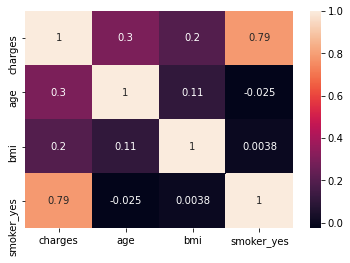

In [47]:
sns.heatmap(data_result[['charges', 'age', 'bmi', 'smoker_yes']].corr(),annot=True)

In [48]:
data_region = pd.get_dummies(data['region'])
data_nr = pd.concat([data, data_region], axis=1)

data_nr

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,1


<AxesSubplot:>

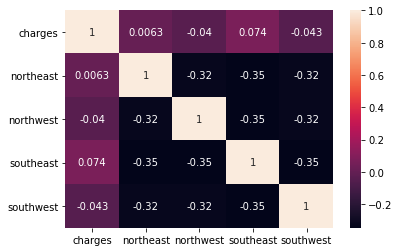

In [49]:
sns.heatmap(data_nr[['charges', 'northeast', 'northwest', 'southeast', 'southwest']].corr(),annot=True)

<AxesSubplot:>

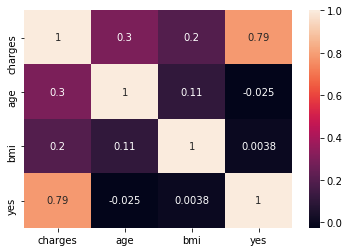

In [50]:
sns.heatmap(data_ns[['charges', 'age', 'bmi', 'yes']].corr(),annot=True)

<AxesSubplot:>

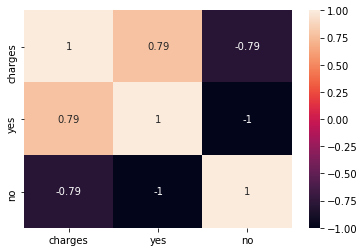

In [51]:
sns.heatmap(data_ns[['charges', 'yes', 'no']].corr(),annot=True)

# Creating a Regression Model - Decision Tree

**19. Splitting the dataset into the Training set and Test set**

In [52]:

from sklearn.model_selection import train_test_split

feature_cols = ['age', 'sex_male', 'sex_female', 'bmi', 'children', 'smoker_yes', 'smoker_no']

X = data_result[feature_cols]

y = data_result.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

      age  sex_male  sex_female     bmi  children  smoker_yes  smoker_no
1043   28         0           1  25.800         0           0          1
968    21         1           0  25.745         2           0          1
594    41         1           0  40.260         0           0          1
1079   63         1           0  33.660         3           0          1
1051   64         1           0  26.410         0           0          1
...   ...       ...         ...     ...       ...         ...        ...
715    60         1           0  28.900         0           0          1
905    26         0           1  29.355         2           0          1
1096   51         0           1  34.960         2           1          0
235    40         0           1  22.220         2           1          0
1061   57         1           0  27.940         1           0          1

[1003 rows x 7 columns]
1043     3161.45400
968      3279.86855
594      5709.16440
1079    15161.53440
1051    14394.55790

**20. Training the Decision Tree Regression on the dataset**

In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state =0)
regressor.fit(X,y)
print(X_test)

      age  sex_male  sex_female     bmi  children  smoker_yes  smoker_no
559    19         1           0  35.530         0           0          1
1087   57         1           0  31.540         0           0          1
1020   51         1           0  37.000         0           0          1
460    49         0           1  36.630         3           0          1
802    21         1           0  22.300         1           0          1
...   ...       ...         ...     ...       ...         ...        ...
1192   58         0           1  32.395         1           0          1
628    58         1           0  38.000         0           0          1
1098   52         0           1  30.875         0           0          1
1038   22         1           0  28.880         0           0          1
936    44         1           0  29.735         2           0          1

[335 rows x 7 columns]


**21. Predicting a new result**

In [54]:
regressor.predict([[0,1,2,3,4,5,6]])

array([11884.04858])

**22. Visualising the decision tree results**

In [74]:
X_grid = np.arange(min(X), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Insurance cost (Decision Tree Regression)')
plt.xlabel('smoker_yes')
plt.ylabel('charges')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'